# **Customer Churn Analysis:**

### Author name: Eman Khalil
### Date: 2/5/2025

> #### The Data was collected from [here](https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/input):

## What is Customer Churn:
Customer churn occurs when customers or subscribers stop engaging with a business or service. In the telecom industry, where multiple service providers compete for customers, users frequently switch from one provider to another. This sector experiences an annual churn rate of 15-25 percent due to the highly competitive nature of the market.

Retaining individual customers can be challenging, as businesses often have a vast customer base and cannot allocate excessive time and resources to each person. The associated costs may outweigh the potential revenue benefits. However, if a company can accurately predict which customers are most likely to leave, it can direct retention efforts toward these high-risk individuals. The primary objective is to expand service coverage and strengthen customer loyalty. Since retaining existing customers is significantly more cost-effective than acquiring new ones, minimizing churn is crucial.

To effectively reduce churn, telecom companies must identify customers at high risk of leaving. Detecting early warning signs requires a comprehensive understanding of customer behavior across various touchpoints, such as store visits, product purchase history, customer service interactions, online transactions, and social media engagement.

By addressing churn proactively, businesses not only maintain their market position but also create opportunities for growth. A larger customer base leads to lower acquisition costs and higher profitability. Consequently, minimizing customer attrition and implementing strong retention strategies remain key priorities for long-term success.

## Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

In [2]:
# loading the dataset
df = pd.read_csv('Cust_Churn.csv')

> ## Inspecting our Data

In [3]:
# Let's quickly preview the first few rows of a dataset
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
# Viewing the dimensions(rows and columns) of the dataset
df.shape

(7043, 21)

In [5]:
# Information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# if there are any null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> #### There are no missing values in the dataset

In [7]:
# Checking if there are any duplicates present in the data
df.duplicated().sum()

np.int64(0)

> ## Type Casting

### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)


### Converting 0 and 1 of senior citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


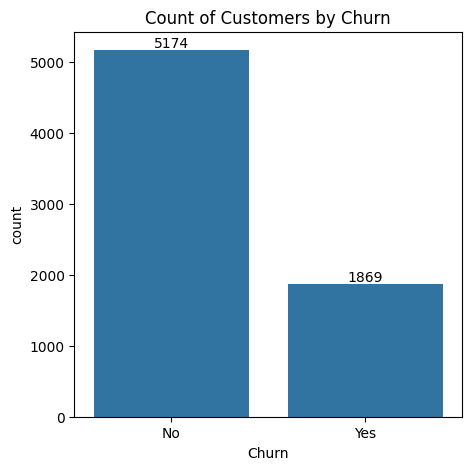

In [10]:
# Set figure size
plt.figure(figsize=(5,5))

# Create a count plot
ax = sns.countplot(x='Churn', data=df)

# Add count labels on bars
ax.bar_label(ax.containers[0])

# Add a title
plt.title("Count of Customers by Churn")

# Show the plot
plt.show()


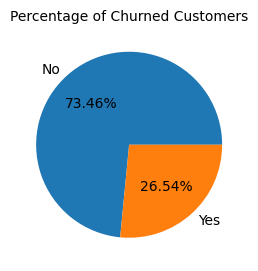

In [11]:
# Set figure size
plt.figure(figsize=(3,4))

# Group data by 'Churn' and count occurrences
gb = df.groupby('Churn').agg({'Churn': "count"})

# Create a pie chart
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")

# Add a title
plt.title("Percentage of Churned Customers", fontsize=10)

# Show the plot
plt.show()

## **Observation**

> #### From the given pie chart we can conclude that 26.54% of our customers have churned out.

> #### Now let's explore the reason behind it

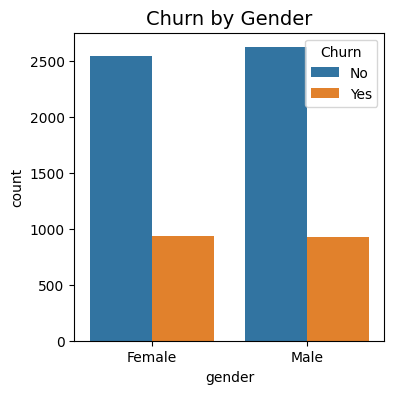

In [12]:
# Set figure size
plt.figure(figsize=(4,4))

# Create a count plot with hue for Churn
sns.countplot(x='gender', data=df, hue='Churn')

# Add title with font size
plt.title('Churn by Gender', fontsize=14)

# Show the plot
plt.show()

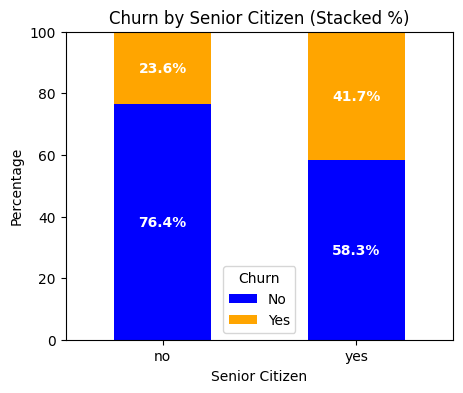

In [13]:
# Calculate counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Define colors (Blue for "No", Orange for "Yes")
colors = ["blue", "orange"]

# Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(5,4), color=colors)

# Add percentage labels to each section
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", weight="bold")

# Customize plot
plt.title("Churn by Senior Citizen (Stacked %)", fontsize=12)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.ylim(0, 100)  # Ensure the y-axis represents 100% scale
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show the plot
plt.show()


## **Observation**
> #### Comparatively a greater percentage of people in senior citizen have churned.

Text(0, 0.5, 'Count')

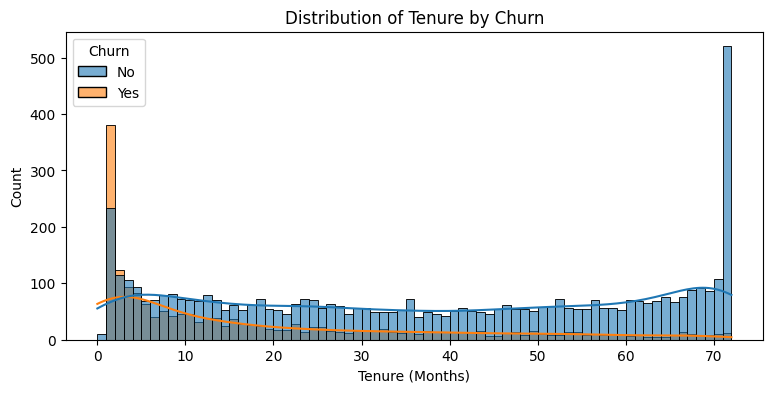

In [14]:
# Set figure size
plt.figure(figsize=(9,4))

# Create histogram with hue for "Churn"
sns.histplot(x="tenure", data=df, bins=72, hue="Churn", kde=True, alpha=0.6)

# Customize title and labels
plt.title("Distribution of Tenure by Churn", fontsize=12)
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")

## **Observation**
> #### People who have used services for long time have stayed and people who have used services for short time have left. 

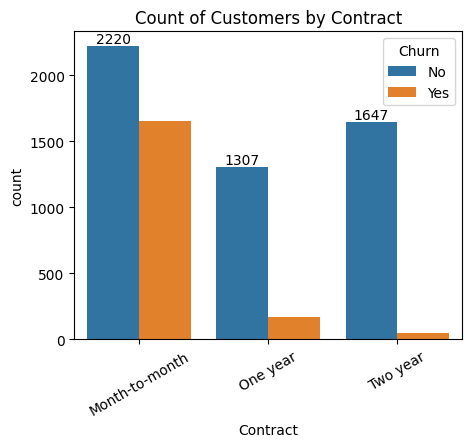

In [15]:
# Set figure size
plt.figure(figsize=(5,4))  # Slightly wider for better label spacing

# Create a count plot
ax = sns.countplot(x="Contract", data=df, hue="Churn")  # Custom color palette

# Add count labels on top of bars
ax.bar_label(ax.containers[0])

# Customize title
plt.title("Count of Customers by Contract", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()


## **Observation**
> #### People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract. 

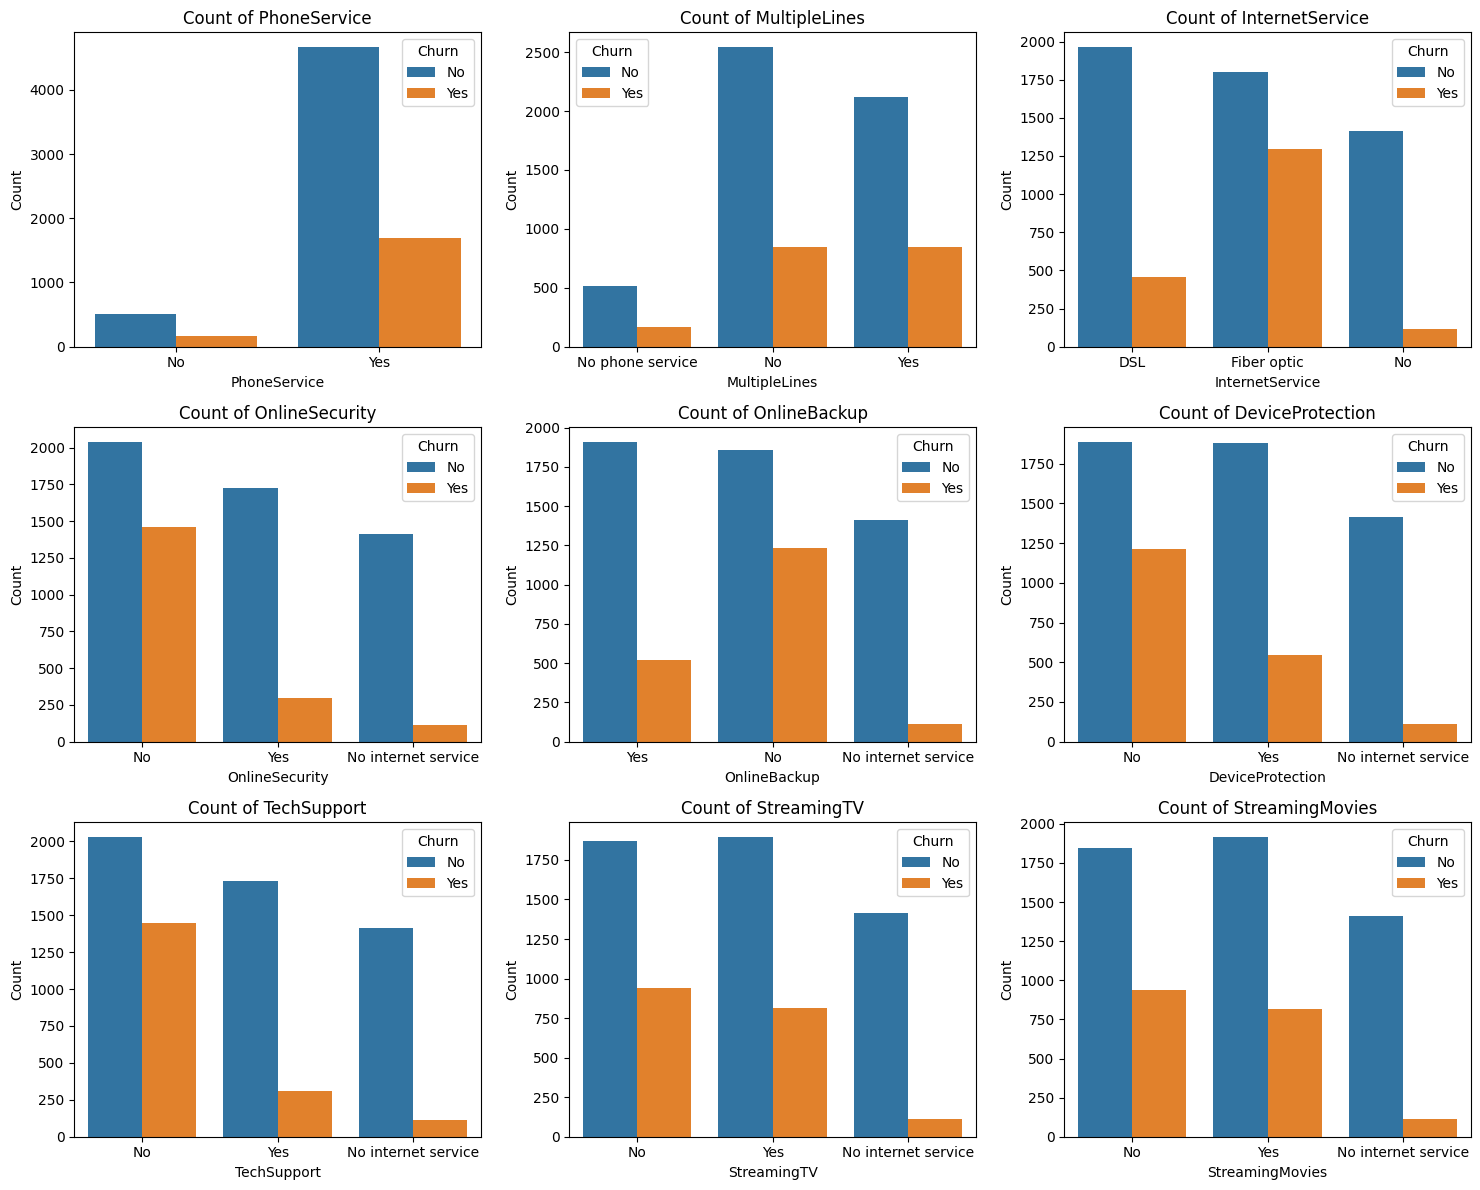

In [16]:
# List of columns to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of subplots (rows, columns)
n_cols = 3
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols else 0)

# Create a figure and set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the columns and create a countplot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f"Count of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


 ## **Observation**
> ##### The plots show the relationship between various services and customer churn. Customers with "No internet service" generally have lower churn rates. For services like "OnlineSecurity," "TechSupport," and "DeviceProtection," those without these features tend to churn more often. Fiber optic internet users exhibit higher churn compared to DSL or no internet.

# **Conclusion**
##### The analysis reveals that customer churn in the telecom industry is significantly influenced by contract type, additional services, and customer engagement. Customers with month-to-month contracts and those without supplementary services like tech support and online security exhibit a higher likelihood of churning. These insights suggest that targeted retention strategies, such as offering incentives for long-term contracts and bundling additional services, can help reduce churn. By identifying high-risk customers early, businesses can optimize their efforts to improve customer retention and overall service satisfaction.